## OpenImagesv6

Potential additional training data with labels. Data is downloaded from fiftyone. Labels are converted into the format we use.
2143 images / 155 images for train / val

In [2]:
#import fiftyone
#import fiftyone.zoo
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import csv
import pandas as pd
import os
import re

### Download data (do not run!)

This only has to be run to download the data (we already did this, so we can skip this part).

In [42]:
#dataset = fiftyone.zoo.load_zoo_dataset(
#              "open-images-v6",
#              split=["train", "validation"],
#              label_types=["detections"],
#              classes=["Monkey"]
#          )

 100% |██████|    4.8Gb/4.8Gb [6.3s elapsed, 0s remaining, 787.1Mb/s]      
 100% |███████████████| 2143/2143 [2.0m elapsed, 0s remaining, 18.3 samples/s]      
Dataset info written to '/home/vogg/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |███████████████| 2143/2143 [4.2s elapsed, 0s remaining, 497.8 samples/s]      
Dataset 'open-images-v6-train' created


In [13]:
#!tar -cf /usr/users/vogg/open-images-v6.tar /home/vogg/fiftyone/open-images-v6/

tar: Removing leading `/' from member names


### Create labels

Before creating the labels the folder structure should be as in crowdhuman, i.e. one folder called images with subfolders train and val, containing single .jpg images.

And similarly one empty folder called labels_with_ids with subfolders train and val in which one .txt file for each .jpg file will be saved.

In [47]:
!rm -r /local_datasets/open-images-v6/labels_with_ids

In [48]:
!mkdir /local_datasets/open-images-v6/labels_with_ids

In [49]:
!mkdir /local_datasets/open-images-v6/labels_with_ids/train

In [50]:
!mkdir /local_datasets/open-images-v6/labels_with_ids/val

In [55]:
data_root = "/local_datasets/open-images-v6/"

train_val = "val" #options: train (2143 images) / val (155 images)

list_imgs = os.listdir(data_root + "images/" + train_val)
len(list_imgs)

155

In [56]:
labels = pd.read_csv(data_root + train_val + "_lab_and_meta/labels/detections.csv")

#select only monkeys
idx = np.where(labels.LabelName == "/m/08pbxl")
labels = labels.loc[idx]
labels.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
1730,015e65bb33ee3e0e,xclick,/m/08pbxl,1,0.000000,1.000000,0.000000,1.000000,0,0,0,0,0
3061,0240e41bc74a1eaa,xclick,/m/08pbxl,1,0.322917,0.535417,0.210938,0.601562,0,0,0,0,0
3062,0240e41bc74a1eaa,xclick,/m/08pbxl,1,0.402083,0.725000,0.410938,0.796875,0,0,0,0,0
5531,04d28dcc8394f2a9,xclick,/m/08pbxl,1,0.000000,1.000000,0.000000,1.000000,0,1,0,0,0
7136,0622e338a23e60ac,xclick,/m/08pbxl,1,0.040625,1.000000,0.000000,1.000000,0,1,0,0,0


ea61721402dc2545.jpg
ea61721402dc2545
(576, 1024, 3)


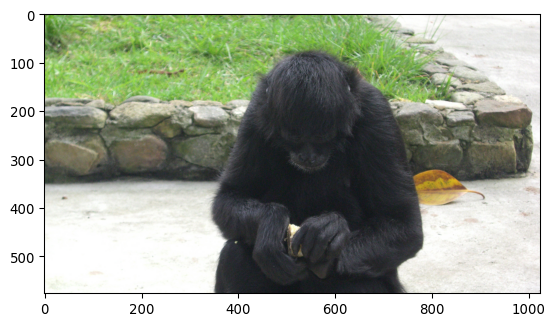

In [57]:
img_id = list_imgs[13]

print(img_id)
print(re.sub("[.]jpg","", img_id))

img = np.asarray(Image.open(data_root + 'images/' + train_val + "/" + img_id))

print(img.shape)
fig, ax = plt.subplots(figsize=(640/96, 640/96), dpi=96)
ax.imshow(img)

In [58]:
i_monkey = 0

for img_id in list_imgs:
    img = np.asarray(Image.open(data_root + 'images/' + train_val + "/" + img_id))

    img_h = img.shape[0]
    img_w = img.shape[1]

    img_id = re.sub("[.]jpg","", img_id)

    idx = np.where(labels.ImageID == img_id)
    image_labels = labels.iloc[idx]

    

    for index, row in image_labels.iterrows():
        x_center = row.XMin + (row.XMax - row.XMin)/2
        y_center = row.YMin + (row.YMax - row.YMin)/2
        w = row.XMax - row.XMin
        h = row.YMax - row.YMin


        #Label-String schreiben.
        label_fpath = data_root + "labels_with_ids/" + train_val + "/" + img_id +'.txt'

        label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
                i_monkey, x_center, y_center, w, h)

        with open(label_fpath, 'a') as f:
            f.write(label_str)

        i_monkey += 1
        if i_monkey % 100 == 0:
            print(i_monkey)

100
